In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [5]:
np.random.seed(0)
n_points = 150  # More than 100 data points for bonus

months = np.tile(np.arange(1, 13), n_points // 12 + 1)[:n_points]
regions = np.random.choice(['North', 'South', 'East', 'West'], size=n_points)
prices = np.random.uniform(1.0, 5.0, size=n_points)
units_sold = np.random.poisson(20, size=n_points) + 5  # to avoid zeros
revenue = prices * units_sold + np.random.normal(0, 5, size=n_points)

# Creating DataFrame
df = pd.DataFrame({'Month': months,'Region': regions,'Price': prices,'Units_Sold': units_sold,'Revenue': revenue}) 

In [6]:
df.dropna(inplace=True)
print("Number of data points after cleaning:", df.shape[0])
print(df.info())

Number of data points after cleaning: 150
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       150 non-null    int32  
 1   Region      150 non-null    object 
 2   Price       150 non-null    float64
 3   Units_Sold  150 non-null    int32  
 4   Revenue     150 non-null    float64
dtypes: float64(2), int32(2), object(1)
memory usage: 4.8+ KB
None


In [11]:
z_scores = np.abs(stats.zscore(df['Revenue']))
df = df[z_scores < 3]
print("Data points after removing outliers:", df.shape[0])

Data points after removing outliers: 149


In [14]:
mean_revenue = np.mean(df['Revenue'])
median_units = np.median(df['Units_Sold'])
std_price = np.std(df['Price'])
max_units = np.max(df['Units_Sold'])
min_units = np.min(df['Units_Sold'])
print("\nNumPy Operations:")
print("Mean Revenue:", mean_revenue)
print("Median Units Sold:", median_units)
print("Std Dev of Price:", std_price)
print("Max Units Sold:", max_units)
print("Min Units Sold:", min_units)


NumPy Operations:
Mean Revenue: 71.9824346445431
Median Units Sold: 24.0
Std Dev of Price: 1.124558806931317
Max Units Sold: 36
Min Units Sold: 12


In [15]:
spearman_corr, _ = stats.spearmanr(df['Price'], df['Revenue'])
print("\nSciPy Spearman correlation (Price vs. Revenue):", spearman_corr)


SciPy Spearman correlation (Price vs. Revenue): 0.8764447669145656


In [16]:
X = sm.add_constant(df['Price'])
model = sm.OLS(df['Revenue'], X).fit()
print("\nStatsmodels Regression Summary:\n", model.summary())


Statsmodels Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     384.1
Date:                Thu, 29 May 2025   Prob (F-statistic):           7.61e-43
Time:                        19:07:16   Log-Likelihood:                -626.45
No. Observations:                 149   AIC:                             1257.
Df Residuals:                     147   BIC:                             1263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1

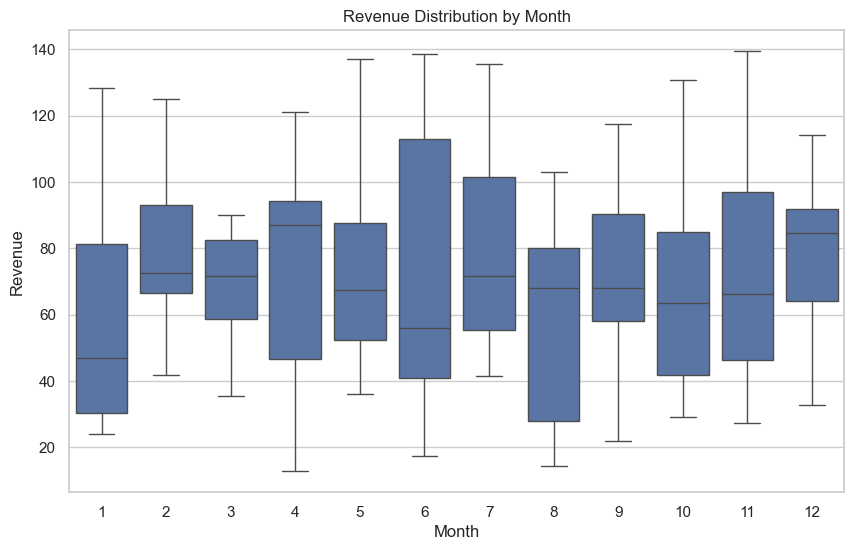

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Revenue', data=df)
plt.title('Revenue Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


C:\Users\Shan Christian\AppData\Local\Temp\ipykernel_21728\2068383628.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Units_Sold', data=df, ci=None)


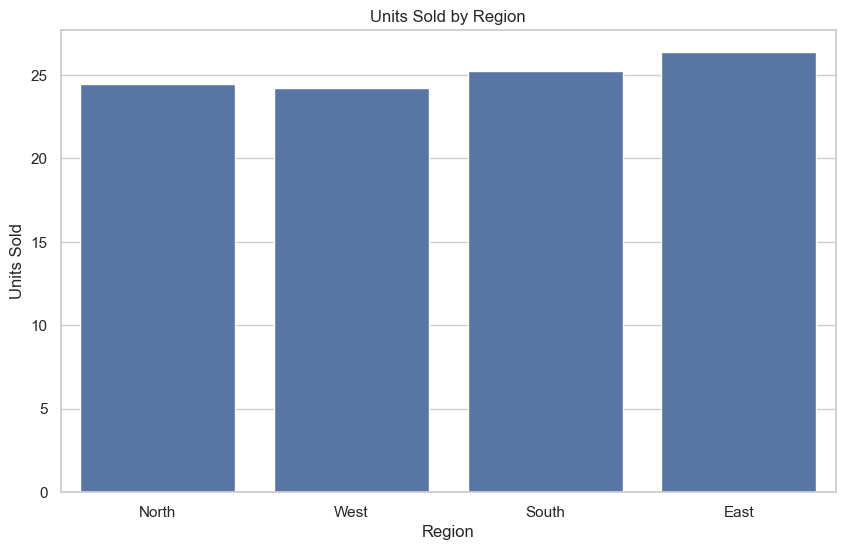

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Units_Sold', data=df, ci=None)
plt.title('Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.show()

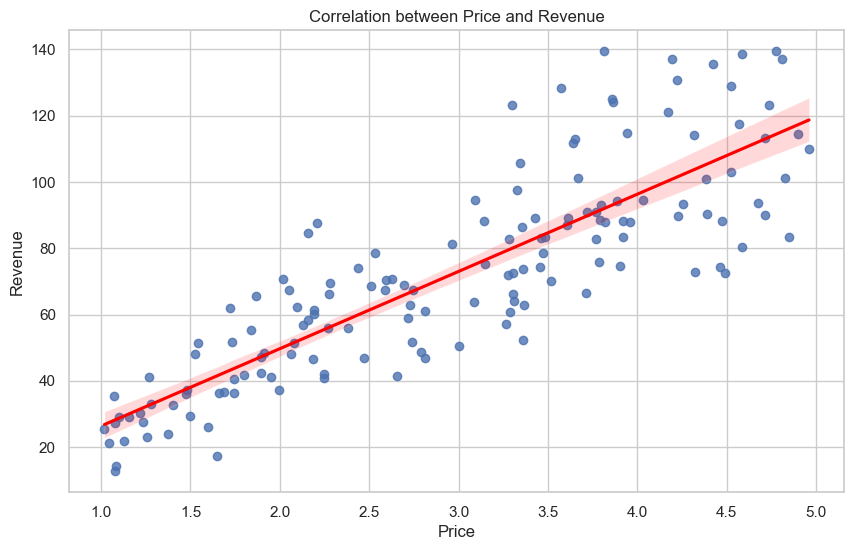

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Revenue', data=df, line_kws={"color": "red"})
plt.title('Correlation between Price and Revenue')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()

In [21]:
corr_matrix = df[['Price', 'Units_Sold', 'Revenue']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


Correlation Matrix:
                Price  Units_Sold   Revenue
Price       1.000000   -0.107662  0.850436
Units_Sold -0.107662    1.000000  0.374541
Revenue     0.850436    0.374541  1.000000


In [22]:
df.to_csv('hotwheels_sales_cleaned.csv', index=False)
print("\nCleaned dataset saved to hotwheel_sales_cleaned.csv")


Cleaned dataset saved to hotwheel_sales_cleaned.csv
